In [1]:
import pandas as pd
coffee_ratings = pd.read_feather('coffee_ratings_full.feather')
print(coffee_ratings.head())


   total_cup_points  species                     owner country_of_origin   
0             90.58  Arabica                 metad plc          Ethiopia  \
1             89.92  Arabica                 metad plc          Ethiopia   
2             89.75  Arabica  grounds for health admin         Guatemala   
3             89.00  Arabica       yidnekachew dabessa          Ethiopia   
4             88.83  Arabica                 metad plc          Ethiopia   

                                  farm_name lot_number       mill ico_number   
0                                 metad plc       None  metad plc  2014/2015  \
1                                 metad plc       None  metad plc  2014/2015   
2  san marcos barrancas "san cristobal cuch       None       None       None   
3     yidnekachew dabessa coffee plantation       None    wolensu       None   
4                                 metad plc       None  metad plc  2014/2015   

                                 company       altitude  ...  

In [2]:
# Point vs. flavor: population
pts_vs_flavor_pop = coffee_ratings[['total_cup_points', 'flavor']]
pts_vs_flavor_pop

# 10 row sample(return 10 random rows)
pts_vs_flavor_samp = pts_vs_flavor_pop.sample(n=10)
pts_vs_flavor_samp

# Python sampling for Series
cup_points_samp = coffee_ratings['total_cup_points'].sample(n=10)
cup_points_samp

152     84.58
844     81.83
97      85.00
527     83.00
205     84.25
1181    79.33
554     82.92
1081    80.42
108     84.92
0       90.58
Name: total_cup_points, dtype: float64

In [3]:
# Population parameters & point estimates
import numpy as np
np.mean(pts_vs_flavor_pop['total_cup_points'])
np.mean(cup_points_samp)

# Point estimates with pandas
pts_vs_flavor_pop['flavor'].mean()
pts_vs_flavor_samp['flavor'].mean()

7.651000000000001

In [4]:
# Convenience sampling coffee ratings
coffee_ratings['total_cup_points'].mean()
coffee_ratings_first10 = coffee_ratings.head(10)
coffee_ratings_first10['total_cup_points'].mean()

89.1

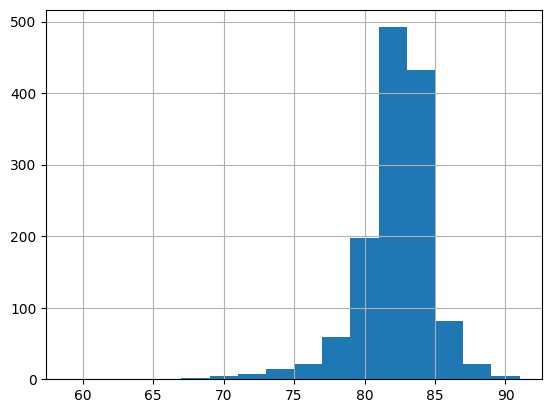

In [5]:
# Visualizing selection bias
import matplotlib.pyplot as plt
import numpy as np
coffee_ratings['total_cup_points'].hist(bins=np.arange(59, 93, 2))
plt.show()

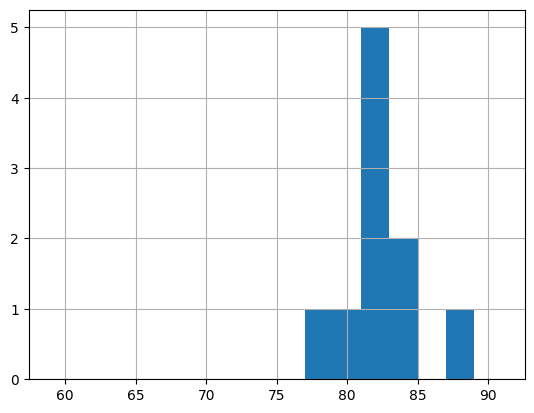

In [32]:
# Visualizing selection bias for a random sample
coffee_sample = coffee_ratings.sample(n=10)
coffee_sample['total_cup_points'].hist(bins=np.arange(59, 93, 2))
plt.show()

In [28]:
# Pseudo-random number generation example
seed = 1
calc_next_random(seed)
calc_next_random(3)
calc_next_random(2)

NameError: name 'calc_next_random' is not defined

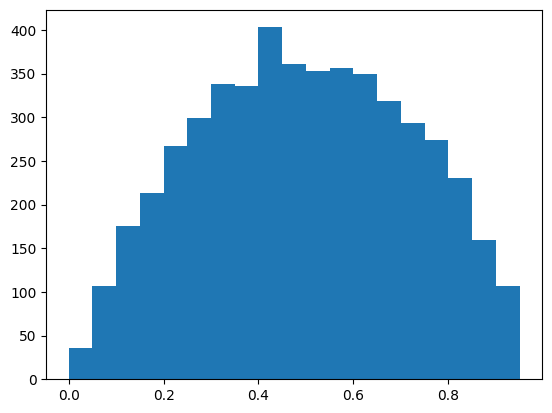

In [6]:
# Visualizing random numbers
randoms = np.random.beta(a=2, b=2, size=5000)
randoms
plt.hist(randoms, bins=np.arange(0, 1, 0.05))
plt.show()

- loc = mean
- scale = standard deviation
- size = number of random numbers from distribution will be returned

In [7]:
# Random number seeds
np.random.seed(20000229)
np.random.normal(loc=2, scale=1.5, size=2)

array([-0.59030264,  1.87821258])

1338
267


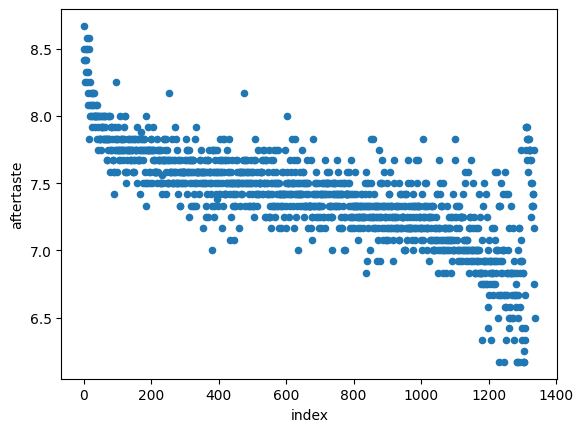

In [8]:
import matplotlib.pyplot as plt
# Systematic sampling- defining the interval
sample_size = 5
pop_size = len(coffee_ratings)
print(pop_size)

interval = pop_size // sample_size
print(interval)

coffee_ratings.iloc[::interval]

# trouble with systematic sampling
coffee_ratings_with_id = coffee_ratings.reset_index()
coffee_ratings_with_id.plot(x='index', y='aftertaste', kind='scatter')
plt.show()

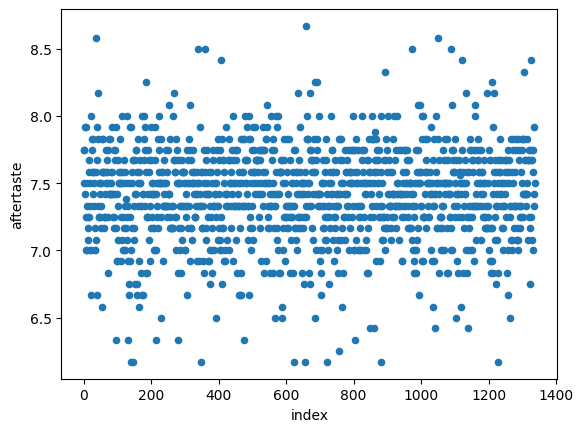

In [9]:
# making systematic sampling safe
shuffled = coffee_ratings.sample(frac=1)
shuffled = shuffled.reset_index(drop=True).reset_index()
shuffled.plot(x='index', y='aftertaste', kind='scatter')
plt.show()

In [10]:
top_counts = coffee_ratings['country_of_origin'].value_counts()
top_counts.head(10)


country_of_origin
Mexico                          236
Colombia                        183
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         52
Costa Rica                       51
Ethiopia                         44
Tanzania, United Republic Of     40
Name: count, dtype: int64

In [11]:
# Filtering for 6 countries
top_counted_countries = ['Mexico', 'Colombia', 'Guatemala', 'Brazil', 'Taiwan', 'United States (Hawaii)']
top_counted_subset = coffee_ratings['country_of_origin'].isin(top_counted_countries)
coffee_ratings_top = coffee_ratings[top_counted_subset]
coffee_ratings_top

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",None,None,None,None,1600 - 1800 m,...,None,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.00,1800.00,1700.00
5,88.83,Arabica,ji-ae ahn,Brazil,None,None,None,None,None,None,...,Bluish-Green,1.0,"September 3rd, 2014",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
13,87.92,Arabica,grounds for health admin,United States (Hawaii),arianna farms,None,None,None,None,2000 ft,...,None,2.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,609.60,609.60,609.60
22,87.17,Arabica,roberto licona franco,Mexico,la herradura,None,la herradura,0,None,1320,...,Green,0.0,"July 26th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1320.00,1320.00,1320.00
25,86.92,Arabica,nucoffee,Brazil,fazenda kaquend,None,None,002/1251/0073,nucoffee,1250m,...,Green,2.0,"December 2nd, 2012",NUCOFFEE,567f200bcc17a90070cb952647bf88141ad9c80c,aa2ff513ffb9c844462a1fb07c599bce7f3bb53d,m,1250.00,1250.00,1250.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,71.00,Arabica,ricardo aaron sampieri marini,Mexico,la morena,None,"tlamatoca, hutusco, ver.",1104351023,None,1800,...,Green,0.0,"July 11th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1800.00,1800.00,1800.00
1301,70.75,Arabica,kurt kappeli,Mexico,various,None,f.i.e.c.h.,0016-2847-0001,globus coffee,1000 meters,...,Green,1.0,"May 5th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1000.00,1000.00,1000.00
1302,70.67,Arabica,volcafe ltda. - brasil,Brazil,None,2017/2018 - Lot 2,copag,None,volcafe ltda.,None,...,Green,55.0,"October 27th, 2018",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,NaN,NaN,NaN
1306,68.33,Arabica,juan carlos garcia lopez,Mexico,el centenario,None,"la esperanza, municipio juchique de ferrer, ve...",1104328663,terra mia,900,...,None,20.0,"September 17th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,900.00,900.00,900.00


In [12]:
# Counts of a simple random sample
coffee_ratings_samp = coffee_ratings_top.sample(frac=0.1, random_state=2021)
coffee_ratings_samp['country_of_origin'].value_counts(normalize=True)

country_of_origin
Mexico                    0.250000
Guatemala                 0.204545
Colombia                  0.181818
Brazil                    0.181818
United States (Hawaii)    0.102273
Taiwan                    0.079545
Name: proportion, dtype: float64

In [13]:
# Proportional stratified sampling
coffee_ratings_strat = coffee_ratings_top.groupby('country_of_origin').sample(frac=0.1, random_state=2021)
coffee_ratings_strat['country_of_origin'].value_counts(normalize=True)

# Equal counts stratified sampling
coffee_ratings_eq = coffee_ratings_top.groupby('country_of_origin').sample(n=15, random_state=2021)
coffee_ratings_eq['country_of_origin'].value_counts(normalize=True)

country_of_origin
Brazil                    0.166667
Colombia                  0.166667
Guatemala                 0.166667
Mexico                    0.166667
Taiwan                    0.166667
United States (Hawaii)    0.166667
Name: proportion, dtype: float64

In [14]:
# Weighted random sampling
import numpy as np
coffee_ratings_weight = coffee_ratings_top
condition = coffee_ratings_weight['country_of_origin'] == 'Taiwan'
coffee_ratings_weight['weight'] = np.where(condition, 2, 1)
coffee_ratings_weight = coffee_ratings_weight.sample(frac=0.1, weights='weight')
coffee_ratings_weight['country_of_origin'].value_counts(normalize=True)

/var/folders/_s/qghdfmbj0zn2l50mb9k17y8c0000gn/T/ipykernel_2546/2892716517.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_ratings_weight['weight'] = np.where(condition, 2, 1)


country_of_origin
Mexico                    0.250000
United States (Hawaii)    0.204545
Colombia                  0.193182
Guatemala                 0.159091
Taiwan                    0.102273
Brazil                    0.090909
Name: proportion, dtype: float64

In [15]:
# Cluster sampling
varieties_pop = list(coffee_ratings['variety'].unique())
varieties_pop

[None,
 'Other',
 'Bourbon',
 'Catimor',
 'Ethiopian Yirgacheffe',
 'Caturra',
 'SL14',
 'Sumatra',
 'SL34',
 'Hawaiian Kona',
 'Yellow Bourbon',
 'SL28',
 'Gesha',
 'Catuai',
 'Pacamara',
 'Typica',
 'Sumatra Lintong',
 'Mundo Novo',
 'Java',
 'Peaberry',
 'Pacas',
 'Mandheling',
 'Ruiru 11',
 'Arusha',
 'Ethiopian Heirlooms',
 'Moka Peaberry',
 'Sulawesi',
 'Blue Mountain',
 'Marigojipe',
 'Pache Comun']

In [ ]:
import random
varieties_samp = random.sample(varieties_pop, k=3)

variety_condition = coffee_ratings['variety'].isin(varieties_samp)
coffee_ratings_cluster = coffee_ratings[variety_condition]

coffee_ratings_cluster['variety'] = coffee_ratings_cluster['variety'].cat.remove_unused_categories()
coffee_ratings_cluster.groupby('variety').sample(n=5, random_state=2021)

AttributeError: Can only use .cat accessor with a 'category' dtype

In [16]:
# Review of simple random sampling
coffee_ratings_srs = coffee_ratings_top.sample(frac=1/3, random_state=2021)
coffee_ratings_srs.shape

(293, 44)

In [ ]:
import random
top_countries_samp = random.sample(top_counted_countries, k=2)
top_condition = coffee_ratings_top['country_of_origin'].isin(top_countries_samp)
coffee_ratings_cluster = coffee_ratings_top[top_condition]
coffee_ratings_cluster['country_of_origin'] = coffee_ratings_cluster['country_of_origin'].cat.remove_unused_categories()
coffee_ratings_clust = coffee_ratings_cluster.groupby('country_of_origin').sample(n=len(coffee_ratings_top) // 6)
coffee_ratings_clust.shape

AttributeError: Can only use .cat accessor with a 'category' dtype

In [40]:
# Calculating mean cup points
# Population
coffee_ratings_top['total_cup_points'].mean()

# Simple random sample
coffee_ratings_srs['total_cup_points'].mean()

# Stratified sample
coffee_ratings_strat['total_cup_points'].mean()

# Cluster sample
coffee_ratings_clust['total_cup_points'].mean()

NameError: name 'coffee_ratings_clust' is not defined

In [17]:
# Sample size is number of rows
len(coffee_ratings.sample(n=300))
len(coffee_ratings.sample(frac=0.25))

# Various sample sizes
coffee_ratings['total_cup_points'].mean()
coffee_ratings.sample(n=10)['total_cup_points'].mean()
coffee_ratings.sample(n=100)['total_cup_points'].mean()

82.1159

In [18]:
# Relative errors
population_mean = coffee_ratings['total_cup_points'].mean()
sample_mean = coffee_ratings.sample(n=sample_size)['total_cup_points'].mean()

# Relative error as percentage
rel_error_pct = 100 * abs(population_mean-sample_mean) / population_mean

In [19]:
# Relative error vs. sample size
import matplotlib.pyplot as plt
errors.plot(x='sample_size', y='relative_error', kind='line')
plt.show()

NameError: name 'errors' is not defined

In [20]:
# same code, 50 times
mean_cup_points_50 = []
for i in range(50):
    mean_cup_points_50.append(coffee_ratings.sample(n=30)['total_cup_points'].mean())
print(mean_cup_points_50)

[82.11966666666667, 82.77033333333334, 82.26933333333334, 81.85966666666667, 81.841, 81.52266666666667, 81.96666666666667, 81.70033333333335, 82.41666666666667, 82.67866666666667, 82.231, 82.312, 81.46700000000001, 82.336, 82.606, 82.114, 82.60633333333334, 82.866, 82.473, 82.24199999999999, 82.63333333333334, 81.953, 82.33633333333333, 82.03033333333333, 82.33366666666666, 82.011, 82.57300000000002, 82.73866666666666, 82.32733333333333, 82.114, 81.82733333333334, 82.49433333333333, 82.45266666666666, 82.40566666666668, 82.32133333333333, 82.06133333333334, 82.12133333333331, 82.21633333333332, 81.4, 83.028, 82.83833333333334, 81.61133333333333, 82.92233333333334, 82.09966666666666, 81.97033333333334, 82.22466666666668, 81.883, 80.90499999999999, 82.03633333333333, 82.14166666666667]


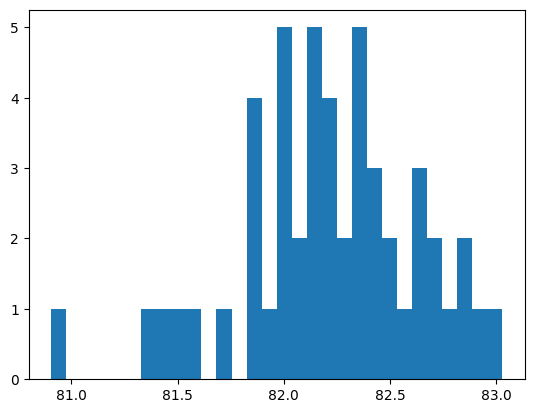

In [21]:
# Distribution of sample means for size 30
import matplotlib.pyplot as plt
plt.hist(mean_cup_points_50, bins=30)
plt.show()

In [22]:
import itertools
import pandas as pd

def expand_grid(d):
    """Create a dataframe from all combinations of given dictionary values."""
    rows = list(itertools.product(*d.values()))
    return pd.DataFrame(rows, columns=d.keys())

dice = expand_grid(
    {'die1': [1, 2, 3, 4, 5, 6],
    'die2': [1, 2, 3, 4, 5, 6],
    'die3': [1, 2, 3, 4, 5, 6],
    'die4': [1, 2, 3, 4, 5, 6]}
)
print(dice)

dice['mean_roll'] = (dice['die1'] + dice['die2'] + dice['die3'] + dice['die4']) / 4
print(dice)

      die1  die2  die3  die4
0        1     1     1     1
1        1     1     1     2
2        1     1     1     3
3        1     1     1     4
4        1     1     1     5
...    ...   ...   ...   ...
1291     6     6     6     2
1292     6     6     6     3
1293     6     6     6     4
1294     6     6     6     5
1295     6     6     6     6

[1296 rows x 4 columns]
      die1  die2  die3  die4  mean_roll
0        1     1     1     1       1.00
1        1     1     1     2       1.25
2        1     1     1     3       1.50
3        1     1     1     4       1.75
4        1     1     1     5       2.00
...    ...   ...   ...   ...        ...
1291     6     6     6     2       5.00
1292     6     6     6     3       5.25
1293     6     6     6     4       5.50
1294     6     6     6     5       5.75
1295     6     6     6     6       6.00

[1296 rows x 5 columns]


<Axes: xlabel='mean_roll'>

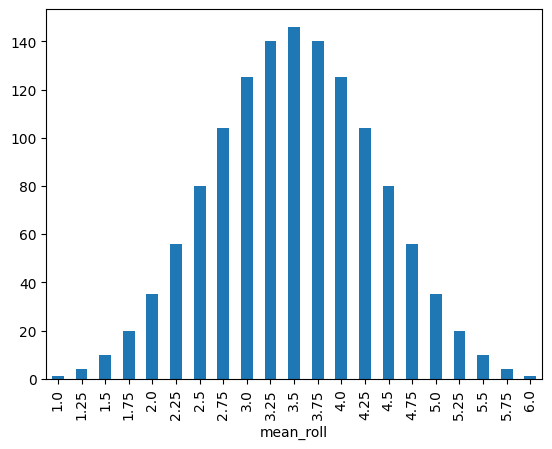

In [23]:
# Exact sampling distribution
dice['mean_roll'] = dice['mean_roll'].astype('category')
dice['mean_roll'].value_counts(sort=False).plot(kind='bar')

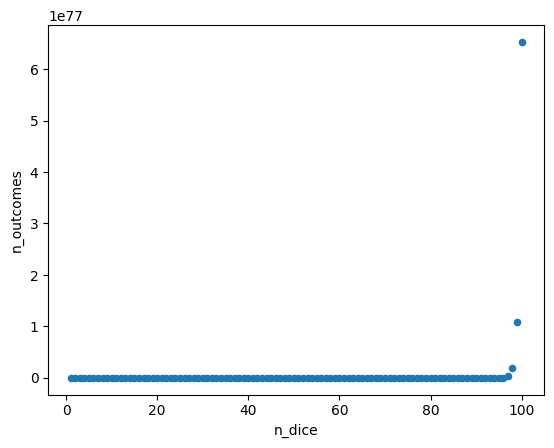

In [24]:
# The number of outcomes increases fast
n_dice = list(range(1, 101))
n_outcomes = []
for n in n_dice:
    n_outcomes.append(6**n)

outcomes = pd.DataFrame(
    {'n_dice': n_dice,
    'n_outcomes': n_outcomes}
)
outcomes.plot(x='n_dice', y='n_outcomes', kind='scatter')
plt.show()

(array([  5.,   8.,  22.,  27.,  45.,  67.,  83., 105., 111.,   0.,  99.,
        108.,  99.,  72.,  59.,  41.,  31.,   9.,   5.,   4.]),
 array([1.25 , 1.475, 1.7  , 1.925, 2.15 , 2.375, 2.6  , 2.825, 3.05 ,
        3.275, 3.5  , 3.725, 3.95 , 4.175, 4.4  , 4.625, 4.85 , 5.075,
        5.3  , 5.525, 5.75 ]),
 <BarContainer object of 20 artists>)

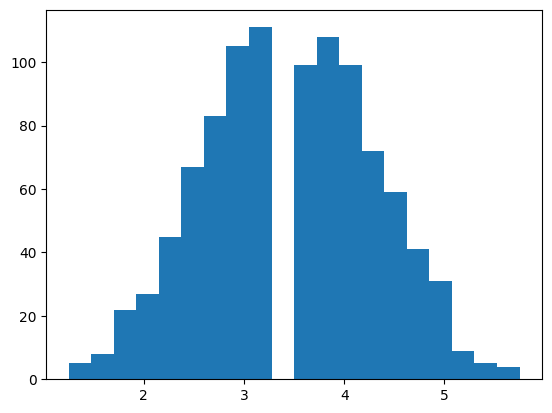

In [25]:
# Simulating the mean of four dice rolls
import numpy as np
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
        np.random.choice(list(range(1, 7)), size=4, replace=True).mean()
    )
# print(sample_means_1000)
plt.hist(sample_means_1000, bins=20)

In [26]:
coffee_ratings['total_cup_points'].std(ddof=0)

2.685858187306438

In [30]:
# Coffee data preparation
coffee_focus = coffee_ratings[['variety', 'country_of_origin', 'flavor']]
coffee_focus = coffee_ratings.reset_index()

# Resampling with .sample()
coffee_resamp = coffee_focus.sample(frac=1, replace=True)

# Repeated coffees
coffee_resamp['index'].value_counts()

# Missing coffees
num_unique_coffees = len(coffee_resamp.drop_duplicates(subset='index'))
len(coffee_ratings) - num_unique_coffees

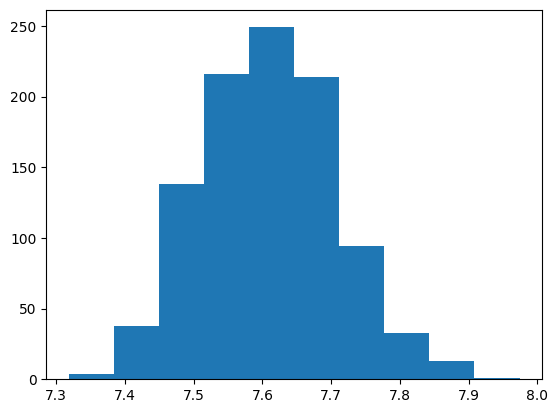

In [33]:
# Boostrapping coffee mean flavor
import numpy as np
mean_flavors_1000 = []
for i in range(1000):
    mean_flavors_1000.append(
        np.mean(coffee_sample.sample(frac=1, replace=True)['flavor'])
    )

import matplotlib.pyplot as plt
plt.hist(mean_flavors_1000)
plt.show()

In [39]:
import numpy as np
mean_flavors_5000 = []
for i in range(5000):
    mean_flavors_5000.append(
        np.mean(coffee_sample.sample(frac=1, replace=True)['flavor'])
    )
bootstrap_distn = mean_flavors_5000

In [40]:
# Sample, bootstrap dist'n, pop'n standard deviations
coffee_sample['flavor'].std()
standard_error = np.std(bootstrap_distn, ddof=1)
standard_error * np.sqrt(500)

2.1446600579982054

In [ ]:
# Quantile method for confidence intervals
np.quantile(coffee_boot_distn, 0.025)
np.quantile(coffee_boot_distn, 0.975)

In [ ]:
# Inverse cumulaive distribution function
from scipy.stats import norm
norm.ppf(quantile, loc=0, scale=1)

In [ ]:
# Standard error method for confidence interval
point_estimate = np.mean(coffee_boot_distn)
std_error = np.std(coffee_boot_distn, ddof=1)

from scipy.stats import norm
lower = norm.ppf(0.025, loc=point_estimate, scale=std_error)
upper = norm.ppf(0.975, loc=point_estimate, scale=std_error)
print((lower, upper))